# NOAA Climate Data

Analisis ini dilakukan untuk membentuk model prediksi suhu dengan menggunakan metode random forest

# 1. Explatory Data Analysis

In [2]:
# Pandas untuk manipulasi data
import pandas as pd
# Read in data and display 
features = pd.read_csv('temps.csv')
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


Identify Anomalies Data

In [3]:
print('The shape of our features is:', features.shape)

The shape of our features is: (348, 12)


In [4]:
features.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [5]:
features.drop('forecast_acc', axis=1, inplace=True)
features.drop('forecast_under', axis=1, inplace=True)

In [6]:
features

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,friend
0,2016,1,1,Fri,45,45,45.6,45,43,29
1,2016,1,2,Sat,44,45,45.7,44,41,61
2,2016,1,3,Sun,45,44,45.8,41,43,56
3,2016,1,4,Mon,44,41,45.9,40,44,53
4,2016,1,5,Tues,41,40,46.0,44,46,41
...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,47
344,2016,12,28,Wed,42,47,45.3,48,41,58
345,2016,12,29,Thurs,47,48,45.3,48,43,65
346,2016,12,30,Fri,48,48,45.4,57,44,42


In [7]:
print('The shape of our features is:', features.shape)

The shape of our features is: (348, 10)


In [8]:
features.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,95.000000


Bikin plot max temp, previous max temp, two days prior max temp, friend estimate. dimana absisnya adalah tanggal

# 2. One Hot Coding

Hal ini dilakukan untuk mengubah data kategori atau kualtitatif menjadi bentuk yang dipahami oleh mesin. Metode ini dilakukan dengan cara mengubah data menjadi bilangan biner yaitu 1 atau 0. 

Dalam hal ini, jika suatu titik data adalah hari Rabu, maka akan ada angka 1 di kolom Rabu dan 0 di semua kolom lainnya. Proses ini dapat dilakukan di panda dalam satu baris!

In [9]:
# One-hot encode the data menggunakan dummies
features = pd.get_dummies(features)
# Display data
features.iloc[:,5:].head(5)

,average,actual,forecast_noaa,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,29,1,0,0,0,0,0,0
1,45.7,44,41,61,0,0,1,0,0,0,0
2,45.8,41,43,56,0,0,0,1,0,0,0
3,45.9,40,44,53,0,1,0,0,0,0,0
4,46.0,44,46,41,0,0,0,0,0,1,0


In [10]:
features.shape

(348, 16)

In [11]:
# numpy untuk konversi ke dalam bentuk arrays
import numpy as np
# Labels adalah nilai yang ingin di prediksi
labels = np.array(features['actual'])
labels

array([45, 44, 41, 40, 44, 51, 45, 48, 50, 52, 45, 49, 55, 49, 48, 54, 50,
       54, 48, 52, 52, 57, 48, 51, 54, 56, 57, 56, 52, 48, 47, 46, 51, 49,
       49, 53, 49, 51, 57, 62, 56, 55, 58, 55, 56, 57, 53, 51, 53, 51, 51,
       60, 59, 61, 60, 57, 53, 58, 55, 59, 57, 64, 60, 53, 54, 55, 56, 55,
       52, 54, 49, 51, 53, 58, 63, 61, 55, 56, 57, 53, 54, 57, 59, 51, 56,
       64, 68, 73, 71, 63, 69, 60, 57, 68, 77, 76, 66, 59, 58, 60, 59, 59,
       60, 68, 77, 89, 81, 81, 73, 64, 65, 55, 59, 60, 61, 64, 61, 68, 77,
       87, 74, 60, 68, 77, 82, 63, 67, 75, 81, 77, 82, 65, 57, 60, 71, 64,
       63, 66, 59, 66, 65, 66, 66, 65, 64, 64, 64, 71, 79, 75, 71, 80, 81,
       92, 86, 85, 67, 65, 67, 65, 70, 66, 60, 67, 71, 67, 65, 70, 76, 73,
       75, 68, 69, 71, 78, 85, 79, 74, 73, 76, 76, 71, 68, 69, 76, 68, 74,
       71, 74, 74, 77, 75, 77, 76, 72, 80, 73, 78, 82, 81, 71, 75, 80, 85,
       79, 83, 85, 88, 76, 73, 77, 73, 75, 80, 79, 72, 72, 73, 72, 76, 80,
       87, 90, 83, 84, 81

In [12]:
# Hapus label dari fitur
# sumbu 1 mengacu pada kolom
features= features.drop('actual', axis = 1)

In [13]:
# Save nama
feature_list = list(features.columns)

In [14]:
feature_list

['year',
 'month',
 'day',
 'temp_2',
 'temp_1',
 'average',
 'forecast_noaa',
 'friend',
 'week_Fri',
 'week_Mon',
 'week_Sat',
 'week_Sun',
 'week_Thurs',
 'week_Tues',
 'week_Wed']

In [15]:
# Convert to numpy array
features = np.array(features)

In [16]:
features

array([[2.016e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.000e+00, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.016e+03, 1.200e+01, 2.900e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.200e+01, 3.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.200e+01, 3.100e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

# 3. Training dan Testing Data

Data dibagi menjadi 75% untuk data training da 25% untuk testing data. Hal ini dilakukan untuk melihat kinerja model yang digunakan serta dapat mendeteksi adanya overfitting

In [17]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [18]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (261, 15)
Training Labels Shape: (261,)
Testing Features Shape: (87, 15)
Testing Labels Shape: (87,)


In [19]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('average')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5.06


In [20]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

Training data sebelumnya dipakai dengan menggunakan model random forest

In [21]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.84 degrees.


In [22]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.98 %.


Hasil menunjukkan bahwa model cenderung memiliki kesalahan rata-rata sebesar 3.84 derajat ketika memprediksi nilai-nilai dalam dataset (semakin rendah nilai MAE semakin baik modelnya). Selain itu, jika dilihat dari nilai akurasi menunjukkan bahwa dari setiap 100 data yang diuji, model tadi secara rata-rata membuat keputusan yang benar untuk sekitar 93.98 dari dataset

# 4. Visualisasi Data

In [23]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [25]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot as pyd
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [26]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [27]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.67
Variable: average              Importance: 0.17
Variable: forecast_noaa        Importance: 0.05
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


In [28]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.92 degrees.
Accuracy: 93.76 %.


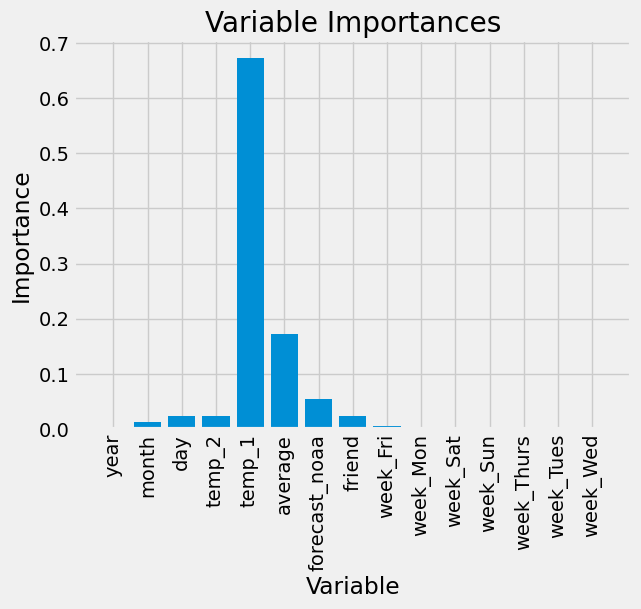

In [29]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

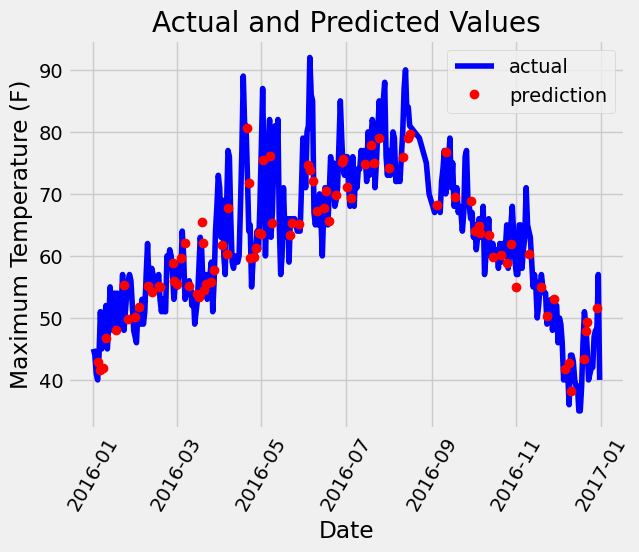

In [30]:
# Use datetime for creating date objects for plotting
import datetime
# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = 60); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

Grafik tersebut menggambarkan bagaimana performa model yang digunakan dengan melihat data secara aktual dan data hasil prediksi dengan menggunakan model random forest. Terlihat bahwa data prediction masih berada dalam jangkauan data actual. Hal ini menunjukkan bahwa model dapat digunakan untuk prediksi nilai suhu di masa mendatang

In [35]:
!jupyter nbconvert --to pdf NOAA.ipynb


[NbConvertApp] Converting notebook NOAA.ipynb to pdf
[NbConvertApp] ERROR | Error while converting 'NOAA.ipynb'
Traceback (most recent call last):
  File "C:\Users\pc\anaconda3\Lib\site-packages\nbconvert\nbconvertapp.py", line 488, in export_single_notebook
    output, resources = self.exporter.from_filename(
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pc\anaconda3\Lib\site-packages\nbconvert\exporters\exporter.py", line 189, in from_filename
    return self.from_file(f, resources=resources, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pc\anaconda3\Lib\site-packages\nbconvert\exporters\exporter.py", line 206, in from_file
    return self.from_notebook_node(
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pc\anaconda3\Lib\site-packages\nbconvert\exporters\pdf.py", line 181, in from_notebook_node
    latex, resources = super().from_notebook_node(nb, resources=resources, **kw)
                       ^^^^^^^^^^^^^^^^^^^^^^^^